In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.DataFrame([[8,8,4],[7,9,5],[6,10,6],[5,12,7]], columns=['cgpa', 'profile_score', 'lpa'])

In [3]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [4]:
def initialize_parameters(layer_dims):

  np.random.seed(3)
  parameters = {}
  L = len(layer_dims)

  for l in range(1, L):

    parameters['W' + str(l)] = np.ones((layer_dims[l-1], layer_dims[l]))*0.1
    parameters['b' + str(l)] = np.zeros((layer_dims[l], 1))


  return parameters

In [5]:
initialize_parameters([2,2,1])

{'W1': array([[0.1, 0.1],
        [0.1, 0.1]]),
 'b1': array([[0.],
        [0.]]),
 'W2': array([[0.1],
        [0.1]]),
 'b2': array([[0.]])}

In [6]:
def linear_forward(A_prev, W, b):

  Z = np.dot(W.T, A_prev) + b

  return Z

In [7]:
# Forward Prop
def L_layer_forward(X, parameters):

  A = X
  L = len(parameters) // 2                  # number of layers in the neural network

  for l in range(1, L+1):
    A_prev = A
    Wl = parameters['W' + str(l)]
    bl = parameters['b' + str(l)]
    #print("A"+str(l-1)+": ", A_prev)
    #print("W"+str(l)+": ", Wl)
    #print("b"+str(l)+": ", bl)
    #print("--"*20)

    A = linear_forward(A_prev, Wl, bl)
    #print("A"+str(l)+": ", A)
    #print("**"*20)

  return A,A_prev

In [8]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X, parameters)

In [9]:
y_hat = y_hat[0][0]

In [10]:
A1

array([[1.6],
       [1.6]])

In [12]:
def update_parameters(parameters,y,y_hat,A1,X):
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat))

  parameters['W1'][0][0] = parameters['W1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[0][0])
  parameters['W1'][0][1] = parameters['W1'][0][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0]*X[1][0])
  parameters['b1'][0][0] = parameters['b1'][0][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][0][0])

  parameters['W1'][1][0] = parameters['W1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[0][0])
  parameters['W1'][1][1] = parameters['W1'][1][1] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0]*X[1][0])
  parameters['b1'][1][0] = parameters['b1'][1][0] + (0.001 * 2 * (y - y_hat)*parameters['W2'][1][0])

In [13]:
update_parameters(parameters,y,y_hat,A1,X)

In [14]:
parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [15]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X, parameters)

In [16]:
update_parameters(parameters,y,y_hat,A1,X)

<ipython-input-12-f16975403a33>:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  parameters['W2'][0][0] = parameters['W2'][0][0] + (0.001 * 2 * (y - y_hat)*A1[0][0])
<ipython-input-12-f16975403a33>:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  parameters['W2'][1][0] = parameters['W2'][1][0] + (0.001 * 2 * (y - y_hat)*A1[1][0])
<ipython-input-12-f16975403a33>:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  parameters['b2'][0][0] = parameters['W2'][1][0] + (0.001

In [17]:
parameters

{'W1': array([[0.11533984, 0.1276017 ],
        [0.11533984, 0.1276017 ]]),
 'b1': array([[0.00257437],
        [0.00257437]]),
 'W2': array([[0.13525283],
        [0.13525283]]),
 'b2': array([[0.14820409]])}

In [18]:
X = df[['cgpa', 'profile_score']].values[0].reshape(2,1) # Shape(no of features, no. of training example)
y = df[['lpa']].values[0][0]

# Parameter initialization
parameters = initialize_parameters([2,2,1])

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.10658137, 0.10658137],
        [0.10658137, 0.10658137]]),
 'b1': array([[0.00082267],
        [0.00082267]]),
 'W2': array([[0.111776],
        [0.111776]]),
 'b2': array([[0.119136]])}

In [19]:
X = df[['cgpa', 'profile_score']].values[1].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[1][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.11458955, 0.1168776 ],
        [0.11458955, 0.1168776 ]]),
 'b1': array([[0.0019667],
        [0.0019667]]),
 'W2': array([[0.12712927],
        [0.12712927]]),
 'b2': array([[0.13612818]])}

In [20]:
X = df[['cgpa', 'profile_score']].values[2].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[2][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.12409711, 0.13272353],
        [0.12412266, 0.13276611]]),
 'b1': array([[0.00355129],
        [0.00355555]]),
 'W2': array([[0.14692424],
        [0.14731907]]),
 'b2': array([[0.15810417]])}

In [21]:
X = df[['cgpa', 'profile_score']].values[3].reshape(2,1) # Shape(no of features, no. of training exaplme)
y = df[['lpa']].values[3][0]

y_hat,A1 = L_layer_forward(X,parameters)
y_hat = y_hat[0][0]

update_parameters(parameters,y,y_hat,A1,X)

parameters

{'W1': array([[0.13482804, 0.15847776],
        [0.1349909 , 0.15884991]]),
 'b1': array([[0.00569748],
        [0.0057292 ]]),
 'W2': array([[0.17312488],
        [0.17534027]]),
 'b2': array([[0.18773702]])}

In [28]:
# epochs implementation

parameters = initialize_parameters([2,2,1])
epochs = 10
loss_lst = []

for i in range(epochs):

  Loss = []

  for j in range(df.shape[0]):

    X = df[['cgpa', 'profile_score']].values[j].reshape(2,1) # Shape(no of features, no. of training example)
    y = df[['lpa']].values[j][0]

    # Parameter initialization


    y_hat,A1 = L_layer_forward(X,parameters)
    y_hat = y_hat[0][0]

    update_parameters(parameters,y,y_hat,A1,X)

    Loss.append((y-y_hat)**2)

  print('Epoch - ',i+1,'Loss - ',np.array(Loss).mean())
  loss_lst.append(np.array(Loss).mean())  # additional step used for visualize loss in graph

Epoch -  1 Loss -  25.321744156025517
Epoch -  2 Loss -  18.320004165722047
Epoch -  3 Loss -  9.473661050729628
Epoch -  4 Loss -  3.2520938634031613
Epoch -  5 Loss -  1.3407132589299962
Epoch -  6 Loss -  1.1726178458115697
Epoch -  7 Loss -  1.2331289135532644
Epoch -  8 Loss -  1.2686856723180788
Epoch -  9 Loss -  1.282007891421992
Epoch -  10 Loss -  1.2866806711744867


In [29]:
parameters

{'W1': array([[0.251385  , 0.42030991],
        [0.26250745, 0.45149331]]),
 'b1': array([[0.02847052],
        [0.03098528]]),
 'W2': array([[0.42075476],
        [0.49891207]]),
 'b2': array([[0.50135566]])}

In [30]:
loss_lst

[25.321744156025517,
 18.320004165722047,
 9.473661050729628,
 3.2520938634031613,
 1.3407132589299962,
 1.1726178458115697,
 1.2331289135532644,
 1.2686856723180788,
 1.282007891421992,
 1.2866806711744867]

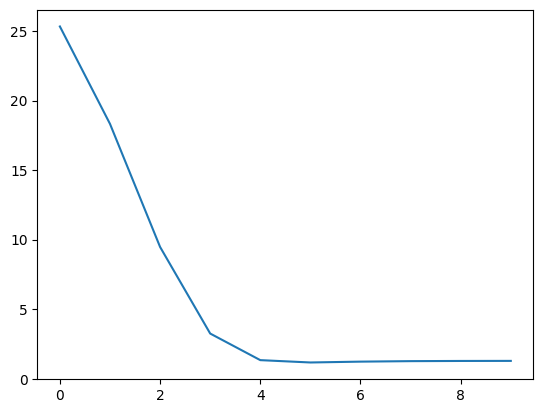

In [31]:
import matplotlib.pyplot as plt
plt.plot(loss_lst)

# using Keras

In [32]:
df

,cgpa,profile_score,lpa
0,8,8,4
1,7,9,5
2,6,10,6
3,5,12,7


In [46]:
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [35]:
model = Sequential()

model.add(Dense(2, activation = 'linear' , input_dim = 2))
model.add(Dense(1, activation = 'linear'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [37]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2)                   │               6 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │               3 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9 (36.00 B)

 Trainable params: 9 (36.00 B)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.get_weights()

[array([[-0.72622025, -1.082662  ],
        [ 0.50535727, -0.04368901]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.0759517 ],
        [0.87033474]], dtype=float32),
 array([0.], dtype=float32)]

In [39]:
new_weights = [np.array([[0.1, 0.1  ],
        [ 0.1, 0.1]], dtype = np.float32),
 np.array([0.0 , 0.0], dtype = np.float32),
 np.array([[0.1 ],
        [0.1]], dtype = np.float32),
 np.array([0.0], dtype = np.float32)]

In [51]:
# setting weights = 0.1 and bias = 0
model.set_weights(new_weights)

In [52]:
model.get_weights()

[array([[0.1, 0.1],
        [0.1, 0.1]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.1],
        [0.1]], dtype=float32),
 array([0.], dtype=float32)]

In [48]:
optimizer = keras.optimizers.Adam(learning_rate = 0.001)
model.compile(loss = 'mean_squared_error' , optimizer = optimizer)

In [49]:
x = df.iloc[: , :-1]
y = df.iloc[: , -1]

model.fit(x , y  , epochs = 75 , batch_size = 1)

Epoch 1/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 33.6870
Epoch 2/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.4735 
Epoch 3/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.8257 
Epoch 4/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.1307 
Epoch 5/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 30.3999 
Epoch 6/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 32.3553 
Epoch 7/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.6140 
Epoch 8/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 31.5166 
Epoch 9/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 28.7929 
Epoch 10/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 23.5675 
Epoch 11/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 27.4157 
Epoch 12/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 29.1823 
Epoch 13/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 22.3423 
Epoch 14/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 26.6398 
Epoch 15/75
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 25.5454 
Epoch 16/75
4/4 ━━━━

In [50]:
model.get_weights()

[array([[0.37378097, 0.37378097],
        [0.36524656, 0.36524656]], dtype=float32),
 array([0.27218553, 0.27218553], dtype=float32),
 array([[0.3727486],
        [0.3727486]], dtype=float32),
 array([0.20441756], dtype=float32)]